In [1]:
from graph_solver import Graph,solve_graph
import numpy as np

# Basic Graph Example
The graph consists of 3 nodes including the exit. Only the middle node is active.
## Creating the graph
The graph class consists of nodes and edges. First add nodes then add edges connecting the nodes. 

You can specify the diffusion and velocities for the entire graph, or for each edge individually.

Each node should have a unique number associated to it, which is a parameter to the add_node method.

Additionally, you can specify a reaction matrix for a node after its identifier. If no reaction matrix is specified the node will be inactive.

To add edges, use the add_edge method, followed by the nodes it connects, then the length of the edge. You can specify diffusion and velocities after the length as well to override the graph default.

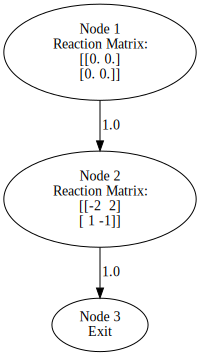

In [2]:
Diff=2
Velocity=.8
num_species=2
Diff_mat=np.full((num_species,),Diff)
Velocity_mat=np.full((num_species,),Velocity)
reaction_mat=np.array([[-2,2],[1,-1]])

g=Graph(Diff_mat,Velocity_mat)
g.add_node(1)
g.add_node(2, reaction_mat)
g.add_exit_node(3)
g.add_edge(1,2,1.)
g.add_edge(2,3,1.)

# Optionally display the graph
g.display()

# Solving the Output Composition Problem
To solve the output composition problem for the graph, simply call the solve_graph function and add the graph object as a parameter. This follows the matrix inversion method in the paper to find the output composition function for each node.

In [3]:
solve_graph(g)

array([[[0.52531247, 0.47468753],
        [0.23734377, 0.76265623]],

       [[0.52531247, 0.47468753],
        [0.23734377, 0.76265623]]])

# Solve_graph Output Format
Above, we can see that the output is a numpy array with shape (2,2,2). The first dimension of the output corresponds to the node. The node ordering is the order they were added to the Graph object. In this example, first node 1 was added, then node 2. So, using notation from the paper, if $f(n)_{ij}$ is the solution to the output composition problem, then in this example $f(1)_{ij}$ is equal to solve_graph(g)\[0\] and $f(2)_{ij}$ is equal to solve_graph(g)\[1\]. 

# Bypass graph
Here we look at another example, where we have added an additional edge from node 1 to the previous graph.

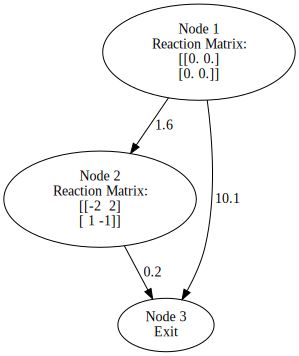

In [4]:
Diff=.2
Velocity=.8
num_species=2
Diff_mat=np.full((num_species,),Diff)
Velocity_mat=np.full((num_species,),Velocity)

reaction_mat=np.array([[-2,2],[1,-1]])

g=Graph(Diff_mat,Velocity_mat)
g.add_node(1)
g.add_node(2, reaction_mat)
g.add_exit_node(3)
g.add_edge(1,2,1.6)
g.add_edge(2,3,.2)
g.add_edge(1,3,10.1)
g.display()

In [5]:
solve_graph(g)

array([[[0.73144435, 0.26855565],
        [0.13427783, 0.86572217]],

       [[0.46333492, 0.53666508],
        [0.26833254, 0.73166746]]])

# Multiple Active Nodes
Next we have an example with 2 active nodes

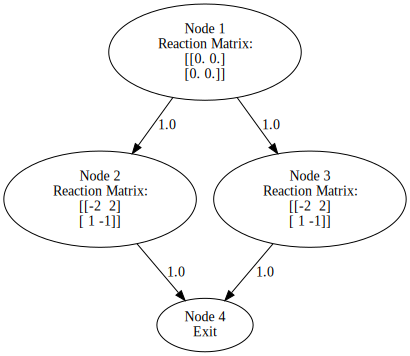

In [6]:
Diff=.2
Velocity=.8
num_species=2
Diff_mat=np.full((num_species,),Diff)
Velocity_mat=np.full((num_species,),Velocity)

reaction_mat=np.array([[-2,2],[1,-1]])

g=Graph(Diff_mat,Velocity_mat)
g.add_node(1)
g.add_node(2, reaction_mat)
g.add_node(3, reaction_mat)
g.add_exit_node(4)
g.add_edge(1,2,1.)
g.add_edge(2,4,1.)
g.add_edge(1,3,1.)
g.add_edge(3,4,1.)
g.display()

In [7]:
solve_graph(g)

array([[[0.41305304, 0.58694696],
        [0.29347348, 0.70652652]],

       [[0.41305304, 0.58694696],
        [0.29347348, 0.70652652]],

       [[0.41305304, 0.58694696],
        [0.29347348, 0.70652652]]])